In [ ]:
import re
from pathlib import Path
import string
from functools import reduce
from math import log
import itertools

In [ ]:
# Enter smoothing or no smoothing.
smoothing = 1
filename = "textfile.txt"

TASK 1 (A): Pre-Processing of RAW Text File: Split File to Sentences

In [ ]:
# Loads file
# input - filename.txt
# returns a list of sentences seperated by newline in the textfile.
def load_file(filename):
    with open(filename) as file:
      data=file.read()
      lines=data.split('\n')
    return lines
lines=load_file(filename)

TASK 1 (B): Perform Tokenization Technique on Raw Text File

In [ ]:
# Tokenizes the sentences meaning split the sentences into words seperated by the "white sapce".
# input - List of sentences
# returns a list of lists of each sentence being tokenized.
def tokenize_sentence(lines):
    lst=[]
    for line in lines:
      line=line.split(' ')
      lst.append(line)
    return lst
tokenize_sentence(lines)

[['[', 'moby', 'dick', 'by', 'herman', 'melville', '1851', ']'],
 ['etymology', '.'],
 ['(',
  'supplied',
  'by',
  'a',
  'late',
  'consumptive',
  'usher',
  'to',
  'a',
  'grammar',
  'school',
  ')'],
 ['the',
  'pale',
  'usher',
  '--',
  'threadbare',
  'in',
  'coat',
  ',',
  'heart',
  ',',
  'body',
  ',',
  'and',
  'brain',
  ';',
  'i',
  'see',
  'him',
  'now',
  '.'],
 ['he',
  'was',
  'ever',
  'dusting',
  'his',
  'old',
  'lexicons',
  'and',
  'grammars',
  ',',
  'with',
  'a',
  'queer',
  'handkerchief',
  ',',
  'mockingly',
  'embellished',
  'with',
  'all',
  'the',
  'gay',
  'flags',
  'of',
  'all',
  'the',
  'known',
  'nations',
  'of',
  'the',
  'world',
  '.'],
 ['he',
  'loved',
  'to',
  'dust',
  'his',
  'old',
  'grammars',
  ';',
  'it',
  'somehow',
  'mildly',
  'reminded',
  'him',
  'of',
  'his',
  'mortality',
  '.'],
 ['"',
  'while',
  'you',
  'take',
  'in',
  'hand',
  'to',
  'school',
  'others',
  ',',
  'and',
  'to',
  'te

TASK 1 (B): Perform Removing of StopWords and Empty Strings, Stemming, Lemmatization and Appending Technique on Raw Text File

In [ ]:
# remove punctuations -print(string.punctuation) ---- !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ ----
# remove empty strings.
# lower case all the words
# add <s> at the beginning and </s> at the end of every sentence in the corpus.
# input - list of lists of words obtained from "tokenize_sentence" function.
# returns - list of lists
import re
import string

def removePunctuation(text):
    punctuation = re.compile(f'[{re.escape(string.punctuation)}]')
    text = punctuation.sub(' ', text)
    return text

def prep_data(lines):
    lstMain = []
    for lst in lines:
        line = " ".join(lst)
        line = removePunctuation(line)
        line = line.lower()
        line = "<s> " + line + " </s>"
        line = line.split(' ')
        line = [word for word in line if word]  # Remove empty strings
        lstMain.append(line)
    print("No of sentences in Corpus: " + str(len(lines)))
    return lstMain

In [ ]:
dataset = load_file(filename)
dataset = tokenize_sentence(dataset)
dataset = prep_data(dataset)

No of sentences in Corpus: 10060


In [ ]:
# Counts the no. of times a word repeats (frequency of each word) in the corpus.
# input - list of lists of words obtained from "prep_data"
# returns - a dictionary defined as {word:frequency} for words of the corpus including <s> and </s>.
def freq_of_unique_words(lines):
    dic = {}
    for lst in lines:
        for word in lst:
            if word in dic:
                dic[word] += 1
            else:
                dic[word] = 1
    return dic
#freq_of_unique_words(dataset)

In [ ]:
unique_word_frequency = freq_of_unique_words(dataset)
unique_word_frequency
#len(unique_word_frequency)

{'<s>': 10060,
 'moby': 84,
 'dick': 84,
 'by': 1204,
 'herman': 1,
 'melville': 1,
 '1851': 3,
 '</s>': 10060,
 'etymology': 1,
 'supplied': 12,
 'a': 4736,
 'late': 30,
 'consumptive': 1,
 'usher': 2,
 'to': 4625,
 'grammar': 2,
 'school': 10,
 'the': 14431,
 'pale': 19,
 'threadbare': 1,
 'in': 4172,
 'coat': 28,
 'heart': 91,
 'body': 110,
 'and': 6430,
 'brain': 37,
 'i': 2127,
 'see': 272,
 'him': 1067,
 'now': 785,
 'he': 1896,
 'was': 1644,
 'ever': 206,
 'dusting': 2,
 'his': 2530,
 'old': 450,
 'lexicons': 1,
 'grammars': 2,
 'with': 1722,
 'queer': 44,
 'handkerchief': 5,
 'mockingly': 1,
 'embellished': 3,
 'all': 1526,
 'gay': 21,
 'flags': 1,
 'of': 6609,
 'known': 80,
 'nations': 12,
 'world': 176,
 'loved': 3,
 'dust': 10,
 'it': 2522,
 'somehow': 44,
 'mildly': 10,
 'reminded': 4,
 'mortality': 1,
 'while': 246,
 'you': 894,
 'take': 137,
 'hand': 214,
 'others': 39,
 'teach': 5,
 'them': 474,
 'what': 618,
 'name': 69,
 'whale': 1226,
 'fish': 169,
 'is': 1725,
 'be':

TASK2: Implementation of Naive Baye's Classifier from Scratch

In [ ]:
import numpy as np

# Calculate prior probabilities P(y)
def calc_prior(features, target):
    '''
    Calculate prior probability P(y) for each class
    P(y) = count of class(y) / total count
    '''
    classes = np.unique(target)
    prior_prob = {}

    for cls in classes:
        prior_prob[cls] = np.sum(target == cls) / len(target)

    return prior_prob

# Calculate mean and variance for each class and feature
def calc_statistics(features, target):
    '''
    Calculate mean and variance for each feature in the dataset
    for every class.
    '''
    classes = np.unique(target)
    mean = {}
    variance = {}

    for cls in classes:
        class_data = features[target == cls]
        mean[cls] = np.mean(class_data, axis=0)
        variance[cls] = np.var(class_data, axis=0)

    return mean, variance

# Gaussian probability density function
def gaussian_density(x, mean, var):
    '''
    Probability density function for normal distribution
    '''
    eps = 1e-9
    coeff = 1.0 / np.sqrt(2.0 * np.pi * var + eps)
    exponent = np.exp(-(np.power(x - mean, 2) / (2 * var + eps)))

    return coeff * exponent

# Calculate posterior probabilities
def calc_posterior(x, features, target):
    '''
    Calculate posterior probability for a given x (new input).
    '''
    prior_prob = calc_prior(features, target)
    mean, variance = calc_statistics(features, target)
    classes = np.unique(target)

    posteriors = []


    for cls in classes:
        posterior = np.log(prior_prob[cls])
        for i in range(len(x)):
            posterior += np.log(gaussian_density(x[i], mean[cls][i], variance[cls][i]))

        posteriors.append(posterior)


    return classes[np.argmax(posteriors)]


TASK: Train the Model on Given Classification Dataset by splitting it into ratio of 80:20 and calculate the accuracy of the trained classifier.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

def preprocess_text(text):
    return text.lower()

data = pd.read_csv('IMDB Dataset.csv')
data = data.head(200)
data['review'] = data['review'].apply(preprocess_text)

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['review']).toarray()
y = np.where(data['sentiment'] == 'positive', 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class NaiveBayesClassifier:
    def __init__(self):
        self.mean = None
        self.variance = None
        self.prior_prob = None

    def fit(self, X_train, y_train):
        self.prior_prob = calc_prior(X_train, y_train)
        self.mean, self.variance = calc_statistics(X_train, y_train)

    def predict(self, X_test):
        preds = []
        for x in X_test:
            preds.append(calc_posterior(x, X_train, y_train))
        return preds

nb_classifier = NaiveBayesClassifier()
nb_classifier.fit(X_train, y_train)

y_pred_custom = nb_classifier.predict(X_test)

accuracy_custom = accuracy_score(y_test, y_pred_custom)
print(f"Accuracy (Custom): {accuracy_custom * 100:.2f}%")


<ipython-input-33-8ea0a979340a>:62: RuntimeWarning: divide by zero encountered in log
  posterior += np.log(gaussian_density(x[i], mean[cls][i], variance[cls][i]))


Accuracy (Custom): 60.00%


TASK 3: Implement Naive Bayes Classifier Using Built-In function
Calculate the Accuracy Score and Metrics for Given Dataset and Compare the Results with your designed algorithm.
Compare using classification matrix and Plots for accuracy, precision and Recall

In [ ]:

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred_builtin = gnb.predict(X_test)

accuracy_builtin = accuracy_score(y_test, y_pred_builtin)
print(f"Accuracy (Built-in): {accuracy_builtin * 100:.2f}%")


Accuracy (Built-in): 55.00%


Custom Precision: 0.0, Custom Recall: 0.0, Custom Accuracy: 0.6
Built-in Precision: 0.45, Built-in Recall: 0.5625, Built-in Accuracy: 0.55


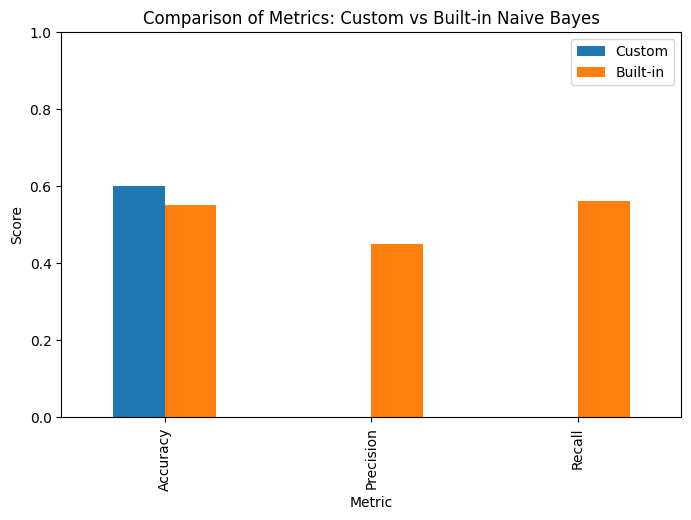

In [ ]:

precision_custom = precision_score(y_test, y_pred_custom, zero_division=0)
recall_custom = recall_score(y_test, y_pred_custom, zero_division=0)

precision_builtin = precision_score(y_test, y_pred_builtin, zero_division=0)
recall_builtin = recall_score(y_test, y_pred_builtin, zero_division=0)


print(f"Custom Precision: {precision_custom}, Custom Recall: {recall_custom}, Custom Accuracy: {accuracy_custom}")
print(f"Built-in Precision: {precision_builtin}, Built-in Recall: {recall_builtin}, Built-in Accuracy: {accuracy_builtin}")


metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Custom': [accuracy_custom, precision_custom, recall_custom],
    'Built-in': [accuracy_builtin, precision_builtin, recall_builtin]
})

metrics.set_index('Metric').plot(kind='bar', figsize=(8, 5), ylim=(0.0, 1.0))
plt.title('Comparison of Metrics: Custom vs Built-in Naive Bayes')
plt.ylabel('Score')
plt.show()


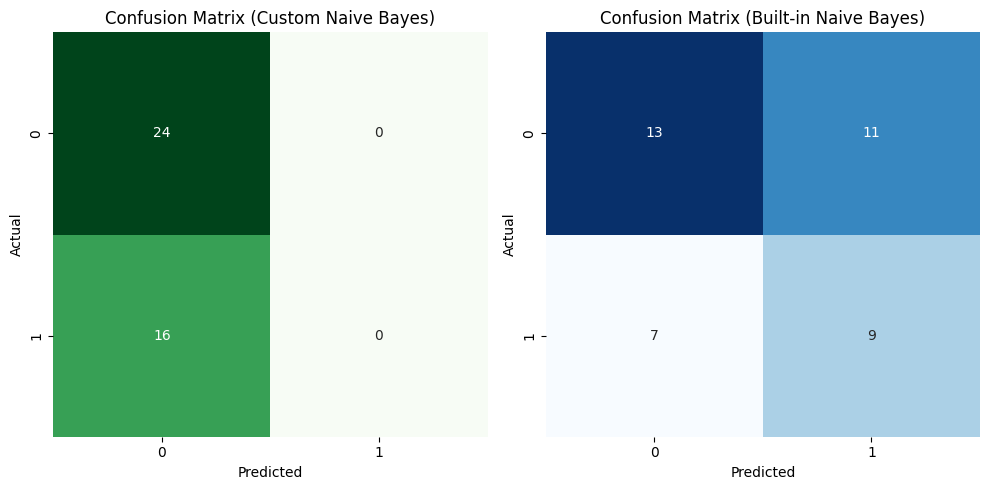

In [ ]:

cm_custom = confusion_matrix(y_test, y_pred_custom)

cm_builtin = confusion_matrix(y_test, y_pred_builtin)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_custom, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix (Custom Naive Bayes)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_builtin, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Built-in Naive Bayes)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()
